# Philanthropy Data Analysis

•	What is the correlation between donor source of wealth and amount of money given over the course of recent years? 

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from scipy.stats import sem

import warnings
warnings.filterwarnings('ignore')

In [10]:
# # Read in the donation data
data_2015 = pd.read_csv("chronicle_data2015.csv", encoding = "ISO-8859-1")
data_2016 = pd.read_csv("chronicle_data2016.csv", encoding = "ISO-8859-1")
data_2017 = pd.read_csv("chronicle_data2017.csv", encoding = "ISO-8859-1")
data_2018 = pd.read_csv("chronicle_data2018.csv", encoding = "ISO-8859-1")
wealth_cat = pd.read_csv("All_wealth_subcategory.csv", encoding = "utf-8")
data_2016.head(2)

,Year,Donor,Where Donor Lives,Donor's Source of Wealth,Recipient,Recipient Location,Cause,Gift type,Gift Value
0,2016,Philip H. and Penelope Knight,Oregon,Manufacturing,U. of Oregon (Eugene),Oregon,Colleges and universities,Pledge,"$500,000,000"
1,2016,Nicolas Berggruen Charitable Trust (Nicolas Be...,California,Investments,Berggruen Institute (Los Angeles),California,Public affairs,NaN,"$500,000,000"


In [12]:
# Combine the data into a single dataset 
combo = [data_2015, data_2016, data_2017, data_2018]
all_df = pd.concat(combo)
all_df.head(2)

,Year,Donor,Where Donor Lives,Donor's Source of Wealth,Recipient,Recipient Location,Cause,Gift type,Gift Value
0,2015,John Santikos,Texas,Real estate,San Antonio Area Foundation,Texas,Community foundations,Bequest,"$605,000,000"
1,2015,John A. Paulson,New York,Finance,"Harvard U. (Cambridge, Mass.)",Massachusetts,Colleges and universities,Unrestricted,"$400,000,000"


In [14]:
# all_df["Donor's Source of Wealth"].unique()

In [16]:
# Review field formats in the combined table prior to any calculations
describe = all_df.describe()
describe
datatype = all_df.dtypes
print(datatype)

Year                         int64
Donor                       object
Where Donor Lives           object
Donor's Source of Wealth    object
Recipient                   object
Recipient Location          object
Cause                       object
Gift type                   object
Gift Value                  object
dtype: object


In [17]:
# Convert column values
all_df["Gift Value"] = all_df["Gift Value"].replace('[\$,]', '', regex=True).astype(int)
all_df["Donor's Source of Wealth"] = all_df["Donor's Source of Wealth"].astype(str)
all_df["Year"] = all_df["Year"].astype(str)
all_df.dtypes

Year                        object
Donor                       object
Where Donor Lives           object
Donor's Source of Wealth    object
Recipient                   object
Recipient Location          object
Cause                       object
Gift type                   object
Gift Value                   int32
dtype: object

In [18]:
dfinal = all_df.merge(wealth_cat, on=("Donor's Source of Wealth", "Donor's Source of Wealth"), how = 'left')
dfinal

,Year,Donor,Where Donor Lives,Donor's Source of Wealth,Recipient,Recipient Location,Cause,Gift type,Gift Value,Wealth Category
0,2015,John Santikos,Texas,Real estate,San Antonio Area Foundation,Texas,Community foundations,Bequest,605000000,Real Estate
1,2015,John A. Paulson,New York,Finance,"Harvard U. (Cambridge, Mass.)",Massachusetts,Colleges and universities,Unrestricted,400000000,Finance
2,2015,Stefan Edlis and Gael Neeson,Illinois,Manufacturing,Art Institute of Chicago,Illinois,Arts,Noncash Gift,400000000,Manufacturing
3,2015,William H. Scheide,New Jersey,Family wealth,Princeton U. (N.J.),New Jersey,Colleges and universities,Noncash Gift,300000000,Family wealth
4,2015,David H. Koch,New York,Oil,Memorial Sloan-Kettering Cancer Center (New York),New York,Health,Pledge,150000000,Oil
5,2015,Stephen A. Schwarzman,New York,Investments,"Yale U. (New Haven, Conn.)",Connecticut,Colleges and universities,NaN,150000000,Finance
6,2015,Donald Sirkin,Washington,Construction,Lighthouse for the Blind and Visually Impaired...,California,Human and social services,Bequest,125000000,Real Estate
7,2015,Samuel Tak Lee,NaN,"Family wealth, Real estate",Massachusetts Institute of Technology (Cambridge),Massachusetts,Colleges and universities,Gift,118000000,Family wealth
8,2015,David Geffen,California,Entertainment,U. of California at Los Angeles,California,Colleges and universities,NaN,100000000,Entertainment
9,2015,Gordon and Betty Moore,California,Technology,California Institute of Technology (Pasadena),California,Colleges and universities,Pledge Unrestricted,100000000,Technology


In [19]:
dfinal.columns

Index(['Year', 'Donor', 'Where Donor Lives', 'Donor's Source of Wealth',
       'Recipient', 'Recipient Location', 'Cause', 'Gift type', 'Gift Value',
       'Wealth Category'],
      dtype='object')

In [20]:
# Convert column values
dfinal["Gift Value"] = dfinal["Gift Value"].replace('[\$,]', '', regex=True).astype(int)
dfinal["Donor's Source of Wealth"] = dfinal["Donor's Source of Wealth"].astype(str)
dfinal["Year"] = dfinal["Year"].astype(int)
dfinal.dtypes

Year                         int32
Donor                       object
Where Donor Lives           object
Donor's Source of Wealth    object
Recipient                   object
Recipient Location          object
Cause                       object
Gift type                   object
Gift Value                   int32
Wealth Category             object
dtype: object

In [21]:
#look at all values for Donor's Source of Wealthr donor wealth
Total = dfinal["Gift Value"].sum()
donors = dfinal["Donor"].count()
print(Total,":", donors)

40928320354 : 3234


In [22]:
# Split categorical string for Donor Wealth
# all_df["Donor's Source of Wealth"] = all_df["Donor's Source of Wealth"].str.split(pat=", ", expand=True)
# all_df.head()

In [23]:
#Calculating the mean by wealth category for each year
result = dfinal.nlargest(5, columns="Gift Value")
result

new = dfinal.groupby(["Wealth Category", 'Year'])["Gift Value"].mean()
new_df = pd.DataFrame(data=new)
new_df.reset_index()

,Wealth Category,Year,Gift Value
0,Education,2015,3.147200e+06
1,Education,2016,6.505284e+06
2,Education,2017,3.502941e+06
3,Education,2018,5.664474e+06
4,Entertainment,2015,9.028837e+06
5,Entertainment,2016,1.646842e+07
6,Entertainment,2017,2.076500e+07
7,Entertainment,2018,1.181011e+07
8,Family wealth,2015,2.141744e+07
9,Family wealth,2016,7.712159e+06


In [24]:
df= dfinal.pivot(index=None, columns='Year', values='Gift Value')
df.fillna(0, inplace=True)
df.head(2)

Year,2015,2016,2017,2018
0,605000000.0,0.0,0.0,0.0
1,400000000.0,0.0,0.0,0.0


In [33]:
# Create a group based on the values in the 'wealth category' column
wealth_grp =new_df.groupby('Wealth Category')
wealth_grp 
# Count how many times each maker appears in our group
sum_donations = wealth_grp['Gift Value'].sum()/1000000000

sum_donations

Wealth Category
Education         0.018820
Entertainment     0.058072
Family wealth     0.073235
Finance           0.053755
Government        0.018755
Healthcare        0.039816
Manufacturing     0.070563
Oil               0.044824
Other             0.025069
Real Estate       0.067819
Retail            0.034705
Technology        0.096239
Transportation    0.024730
Name: Gift Value, dtype: float64

In [34]:
dfinal = dfinal.dropna(how='any')
# dfinal.head(2)

In [39]:
# dfinal.plot();

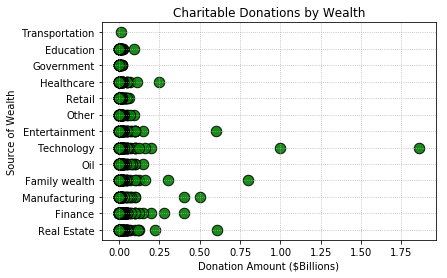

In [36]:
# Combined data
x_axis = dfinal["Gift Value"]/1000000000
y_axis = dfinal["Wealth Category"]
# colors = ["Red", "Blue", "Green", "Gold"]
# legend = [2015, 2016, 2017,2018]
plt.scatter(x_axis, y_axis, s=110, edgecolors='black', color='g', marker="o", alpha=0.90)

#Chart labels
plt.title("Charitable Donations by Wealth")
plt.xlabel("Donation Amount ($Billions)")
plt.ylabel("Source of Wealth")
plt.grid(linestyle='dotted')
# plt.legend((2015, 2016, 2017, 2018),scatterpoints=1,
#            loc='upper left',bbox_to_anchor=(1.0, 1.035),ncol=1,\
#            fontsize=8, markerscale=0.75,
#            title='Year',edgecolor='none',framealpha=1.00)

plt.savefig("All_Donations vs. Wealth.png")
plt.show()

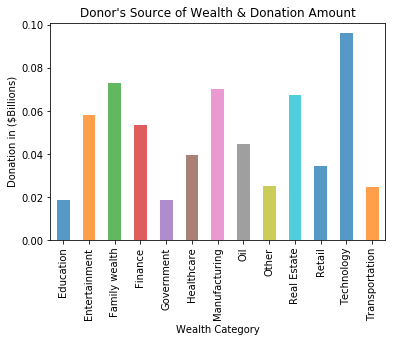

<Figure size 432x288 with 0 Axes>

In [41]:
# Create a bar chart based off of the group series from above
count_chart = sum_donations.plot(kind='bar',align="center", alpha=0.75)

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Wealth Category")
count_chart.set_ylabel("Donation in ($Billions)")
count_chart.set_title("Donor's Source of Wealth & Donation Amount")

plt.savefig("Wealth by Source.png")
plt.show()
plt.tight_layout()